In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
os.environ["PYTHONHASHSEED"] = "42"
codetrace = "/home/franlucc/projects/codetrace"
os.environ["PYTHONPATH"] = codetrace
sys.path.append(codetrace)
RESULTS_DIR="/mnt/ssd/franlucc/scratch/type-steering-results"
ANALYSIS_DIR=f"{codetrace}/codetrace/analysis/figures"

In [3]:
from codetrace.analysis.plot_fig_icl import _load, compare_icl, plot_icl
from codetrace.analysis.plot_fig_correlation import plot_correlation
from codetrace.analysis.plot_fig_all_models import _load as load_all_models, plot_all_models
from codetrace.analysis.plot_fig_layer_ablations import _load as load_layer_ablation, plot_all_layers
from codetrace.analysis.plot_fig_splits import _load as load_splits, plot_splits
from codetrace.analysis.plot_fig_lang_transfer import _load as load_lang_transfer, plot_lang_transfer
import pandas as pd

/mnt/ssd/franlucc/envs/interp/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


## Layer ablation

In [33]:
layer_df = load_layer_ablation(RESULTS_DIR, "qwen2p5_coder_7b_base","py")

Loading from local: True


checking: 100%|██████████| 546/546 [00:01<00:00, 356.38it/s]


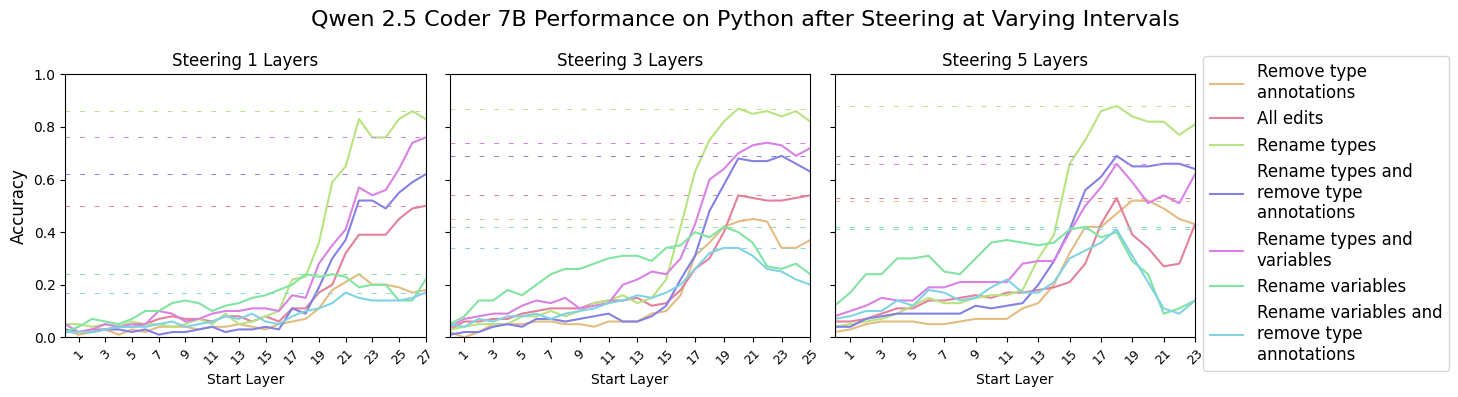

In [34]:
plot_all_layers(layer_df, ANALYSIS_DIR)

## All Models

In [6]:
model_df = load_all_models(RESULTS_DIR, "ts", 5)

Loading from local: True


models:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Test split Success Rate: 100%|██████████| 938/938 [00:06<00:00, 154.32it/s]


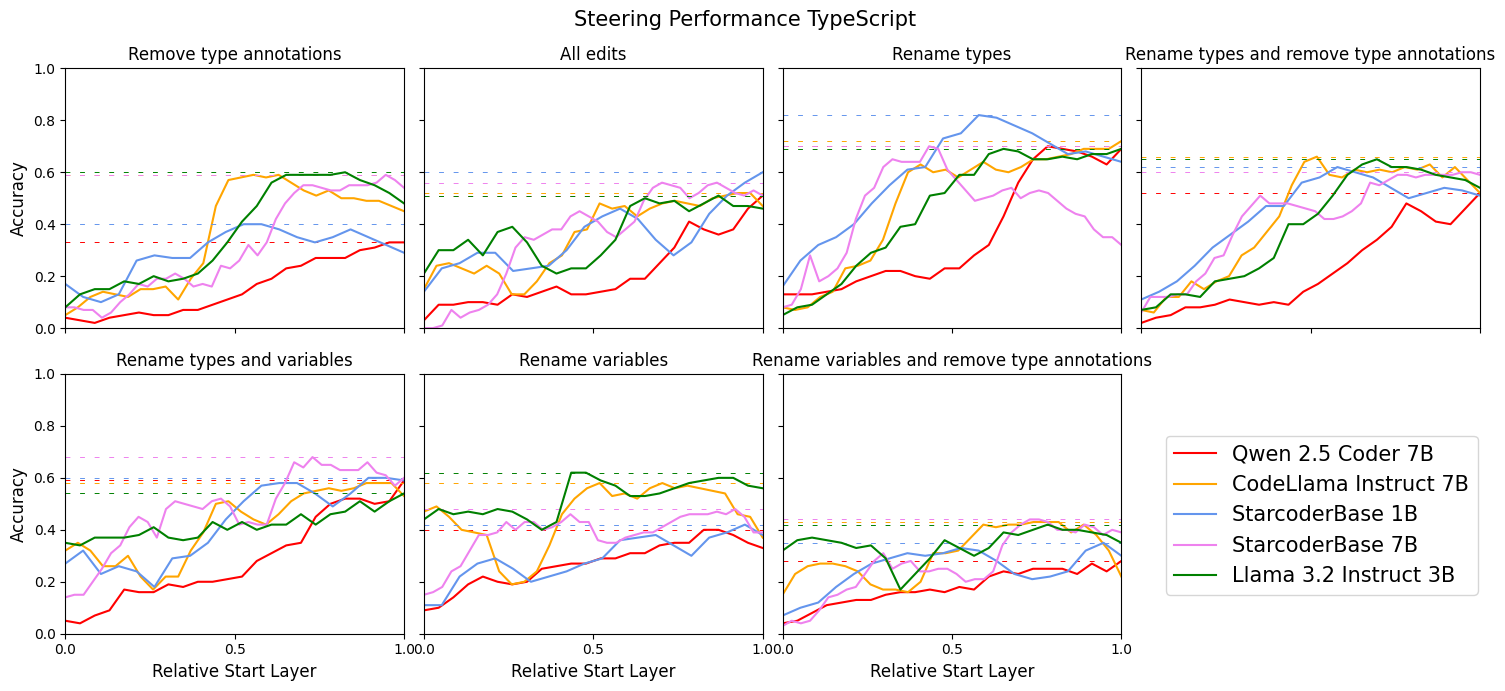

In [7]:
plot_all_models(model_df, ANALYSIS_DIR)

## Splits Ablation

In [46]:
splits_df = load_splits(RESULTS_DIR, "starcoderbase-1b","py",1)

Loading from local: True


Checking splits: 100%|██████████| 168/168 [00:00<00:00, 6600.38it/s]


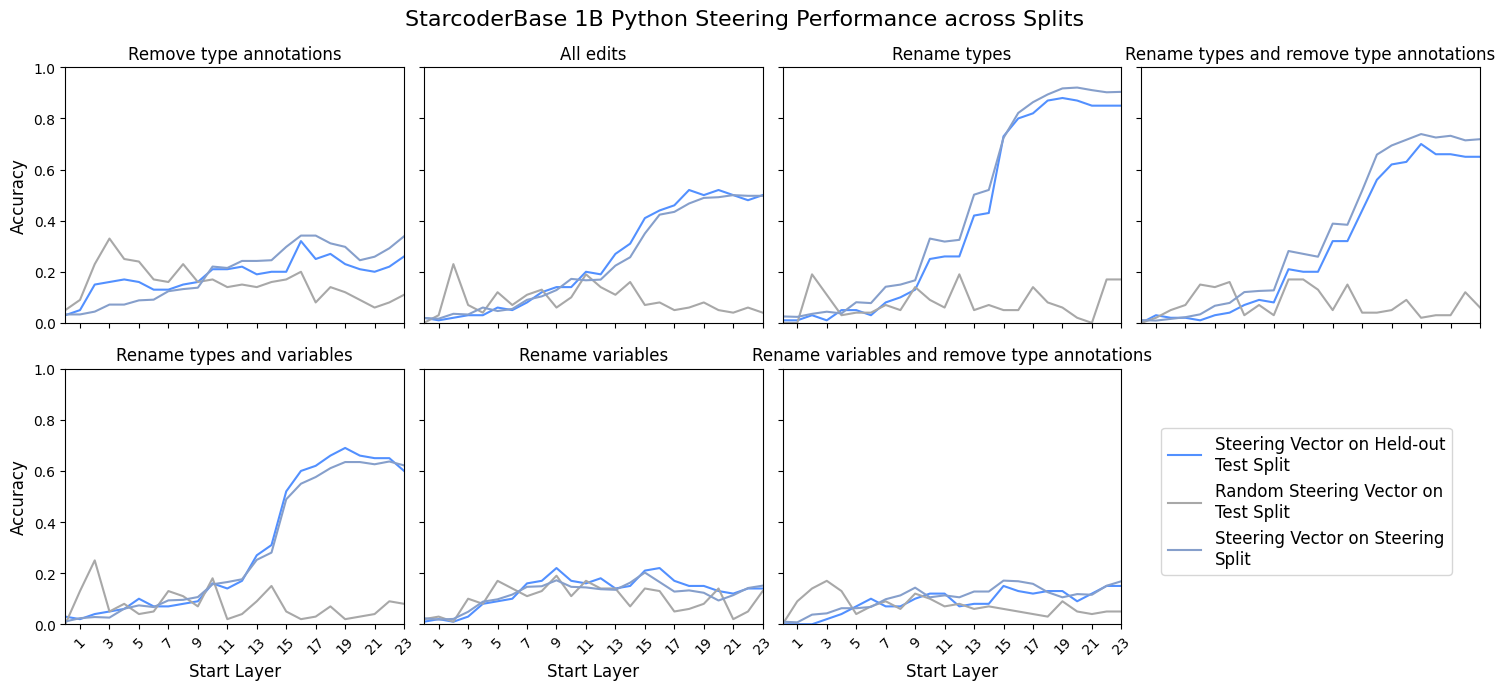

In [47]:
plot_splits(splits_df, ANALYSIS_DIR)

## ICL comparison

In [18]:
df_comp, df_icl_comp = _load(RESULTS_DIR, 5, f"{codetrace}/results")

Loading from local: True


Loading models data:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Test Split Success: 100%|██████████| 1876/1876 [00:00<00:00, 3514.00it/s]


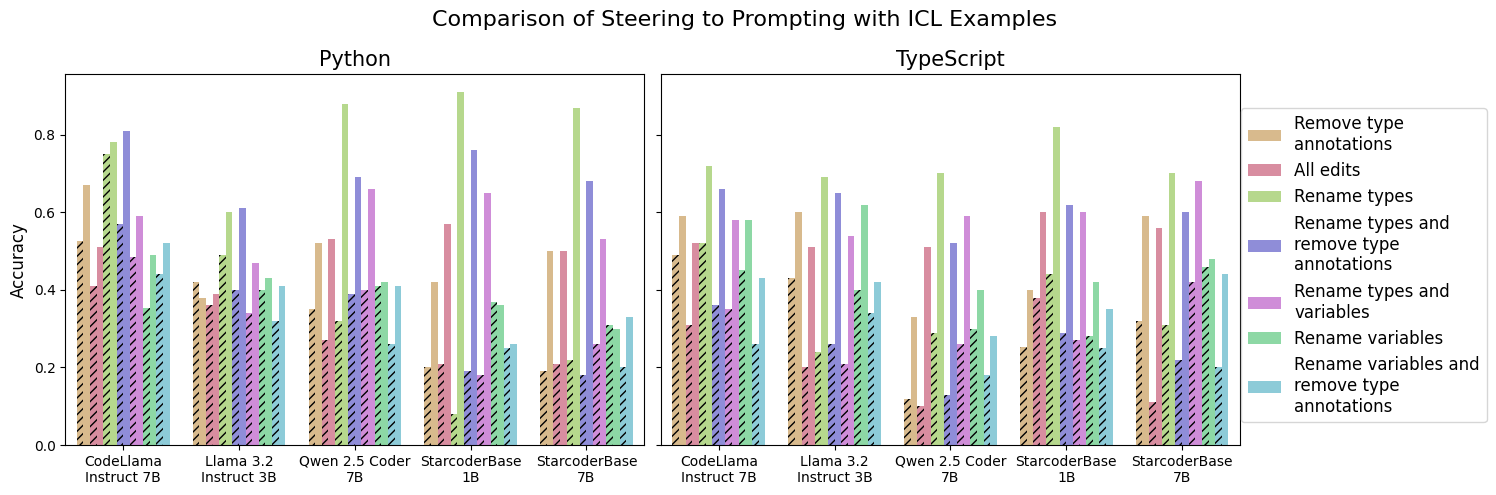

In [44]:
df = compare_icl(df_comp, df_icl_comp, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.csv")
plot_icl(df, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.pdf")

## Correlation

In [5]:
corr_df = pd.read_csv(f"{ANALYSIS_DIR.replace('figures','_figures')}/correlation-interval_5.csv")

In [6]:
corr_df.columns

Index(['Unnamed: 0', 'steering_success', 'typechecks_before',
       'typechecks_after', 'errors_before', 'errors_after', 'fim_type',
       'prediction_before_steer', 'prediction_after_steer', 'mutated_program',
       'lang', 'mutations', 'layers', 'start_layer', 'model', 'interval'],
      dtype='object')

In [12]:
from collections import Counter
corr_df["name"] = corr_df["model"] + corr_df["mutations"] + corr_df["lang"]
corr_df = corr_df.sort_values(["model","start_layer"])

seen = []
new_df = []
for _,row in corr_df.iterrows():
    if Counter(seen)[row["name"]] < 100:
        new_df.append(row)
        seen.append(row["name"])

new_d = pd.DataFrame.from_records(new_df)

Correlation 68 -0.6869577662538361 5.1583314487592144e-11


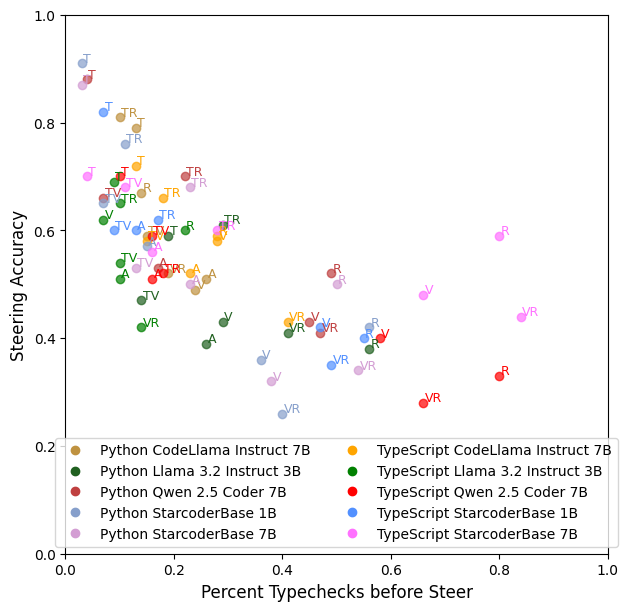

In [11]:
plot_correlation(new_d, f"{ANALYSIS_DIR}/correlation-interval_5.pdf",False)

## Lang transfer

In [41]:
lang_transfer_df = load_lang_transfer(RESULTS_DIR, "starcoderbase-7b", "py", 5)

Loading from local: True


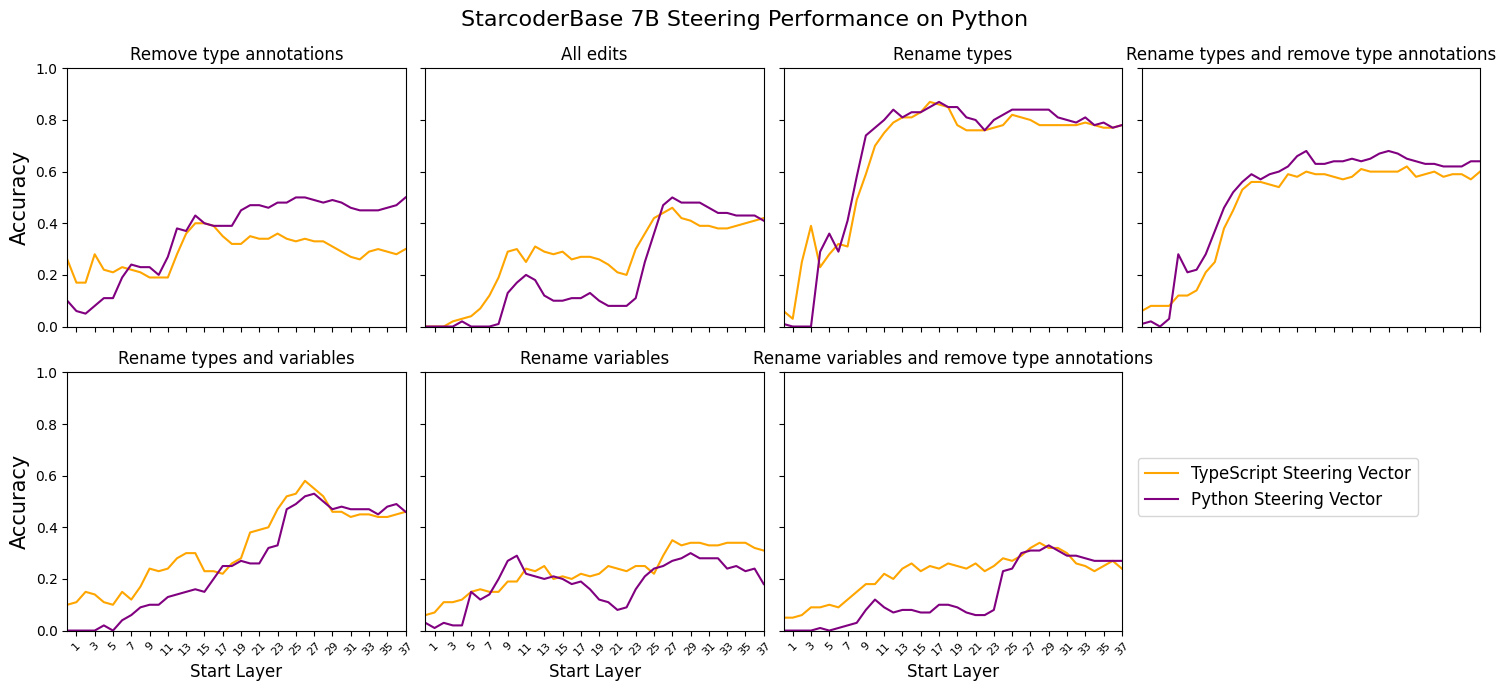

In [45]:
plot_lang_transfer(lang_transfer_df, ANALYSIS_DIR)